## Exercise 3.2
  
Write a function that can shift the MNIST images by one pixel in any of the four directions. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set.
Finally, train your best model on this expanded training set and measure its accuracy on the test set.

In [37]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt

from scipy.ndimage import shift


In [16]:
# Get the MNIST data and split it into training and test sets
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [20]:
# MNIST images are stored in a 1D array of 784 values. shift_image() requiers
# a 2D array, so we reshape it to 28x28 pixels via reshape() method.
# Before returning the new 2D array, we reshape it back to 1D array

def shift_image(image, dx, dy):
    image = image.reshape((28, 28)) # Change the shape to 28x28 pixels
    shifted_image = shift(image, [-dy, dx], cval=0)
    return shifted_image.reshape(-1)

In [47]:
# Test the shift_image function
image = X_train[0]
image_r = shift_image(image, 4, 0)
image_l = shift_image(image, -4, 0)
image_u = shift_image(image, 0, 4)
image_d = shift_image(image, 0, -4)
test_images = [image, image_r, image_l, image_u, image_d]

In [44]:
def plot_images(images):
    fig, axs = plt.subplots(2, 3, figsize=(10, 7))
    indices = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1)]

    for idx, image in zip(indices, images):
        i, j = idx
        axs[i, j].imshow(image.reshape(28, 28), cmap='Greys')  # 'cmap' ist optional, für Graustufenbilder
        axs[i, j].axis('off') 

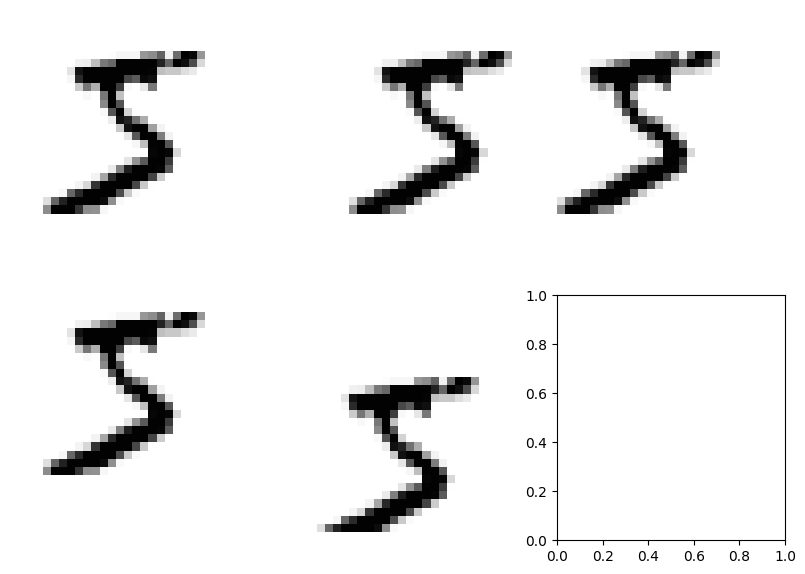

In [48]:
plot_images(test_images)

In [42]:
X_train_r = np.array([shift_image(image, 1, 0) for image in X_train])
X_train_l = np.array([shift_image(image, -1, 0) for image in X_train])
X_train_u = np.array([shift_image(image, 0, 1) for image in X_train])
X_train_d = np.array([shift_image(image, 0, -1) for image in X_train])

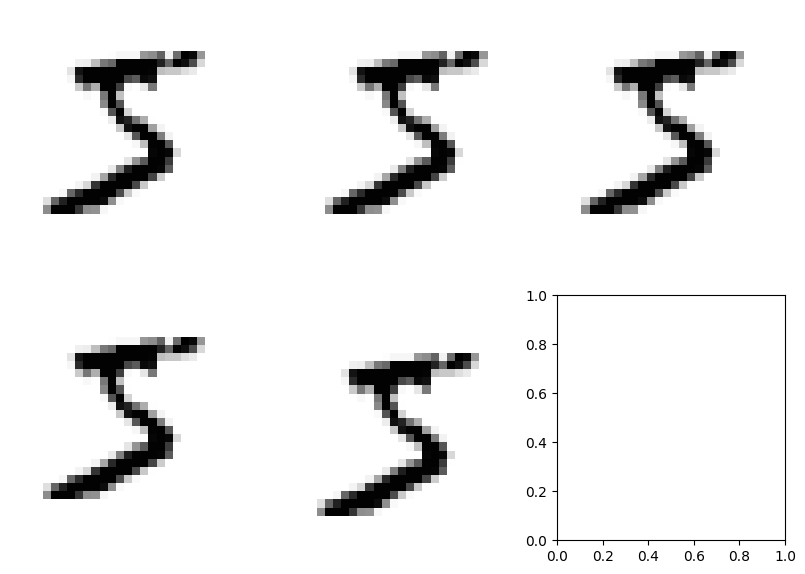

In [49]:
# Double check whether the shifted images are correct
plot_images([X_train[0], X_train_r[0], X_train_l[0], X_train_u[0], X_train_d[0]])

In [51]:
X_train = np.concatenate([X_train, X_train_r, X_train_l, X_train_u, X_train_d])
y_train = np.concatenate([y_train] * 5)

In [52]:
X_train.shape, y_train.shape

((300000, 784), (300000,))

In [53]:
# Best parameters: {'n_neighbors': 4, 'weights': 'distance'} from the previous exercise
knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [54]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9763